# Fibonacci Triples in Markoff's equation

This Python notebook was used to provide a table for Corollary 2.2 and check Lemma 4.9.

To remember:
> __*Lemma 4.9*__. Let $m>0$. Let $(F(a), F(b), F(c))$ and $(F(a'),F(b'),F(c'))$ be two ordered minimal m-Markoff triples such that $c'=c-1$. If $c\ge 11$, then $(a,a')\ne (2,2)$.

In Corollary 2.2, we decided to generate a table with lower and upper bounds for the ratio $\frac{F(n)}{F(n+a)}$ given a certain $a$ and $N$ such as $n\ge N$. This would be useful for other sections in the paper, especially Lemma 4.9.

In Lemma 4.9, at one point during the proof we found that it was necessary to compare certain expressions that contained ratios as in Corollary 2.2.

### Libraries

In [1]:
from sympy import init_session
import matplotlib.pyplot as plt
import pandas as pd

### SymPy initialization

In [2]:
init_session(use_latex=True, quiet=True)

### Fibonacci numbers

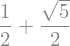

In [3]:
phi = (1 + sqrt(5)) / 2 
phi_ = -1 / phi
phi

In [4]:
# Binary Exponentiation and calculating nth Fibonacci number
def binary_exp(a: int | float, b: int) -> int | float:
    '''
    This function calculates a raised to the power b using binary exponentiation.

    Parameters:
    - a: int|float
    - b: int

    Returns:
    - int/float
    '''
    if b == 0:
        return 1
    
    if b < 0:
        a = 1 / a
        b = -b
        
    out_ = binary_exp(a, b // 2)
    out_ = out_ * out_
    
    if b % 2 != 0:
        out_ = out_ * a
    
    return out_

def fib(n: int) -> int:
    '''
    This function calculates the nth Fibonacci number using the formula:
    F(n) = (phi^n - phi_^n) / sqrt(5)

    Parameters:
    - n: int

    Returns:
    - int
    '''
    return (binary_exp(phi, n) - binary_exp(phi_, n)) / sqrt(5)


### Corollary 2.2: Fib(n) / Fib(n+a)

In [5]:
# Calculate bounds

def cocient_fib_bounds(N: int, a: int) -> tuple[float, float]:
    '''
    This function calculates the upper and lower bounds of the ratio 
    of fib(n)/fib(n+a) for n>=N, according to Lemma 2.1.
    
    Parameters:
    - N: int
    - a: int

    Returns:
    - tuple[float, float]
    '''
    bound = fib(N) / fib(N + a)
    bound2 = fib(N + 1) / fib(N + a + 1)

    upper_bound = max(bound, bound2)
    lower_bound = min(bound, bound2)

    return upper_bound, lower_bound


In [6]:
# Plot bounds
def plot_cocient_fib(N: int, a: int, k: float, K: float) -> None:
    '''
    This function plots the ratio of fib(n)/fib(n+a) and the upper
    and lower bounds calculated with the function cocient_fib_bounds().

    Parameters:
    - N: int
    - a: int
    - k: float
    - K: float

    Returns:
    - None
    '''
    x = range(1, 4 * N + 1)
    y = [fib(n) / fib(n + a) for n in x]
    plt.plot(x, y)
    plt.plot(x[2], y[2], 'ro')
    plt.plot(x[3], y[3], 'ro')
    plt.plot(x, [phi ** (-a) for _ in x], 'g--', label='phi^(-a)')
    plt.plot(x, [k for _ in x], 'b--', label=f'lower bound for n>={N}')
    plt.plot(x, [K for _ in x], 'r--', label=f'upper bound for n>={N}')
    plt.xlabel('n')
    plt.ylabel(f'fib(n)/fib(n+{a})')
    plt.legend()
    plt.show()


In [7]:
# Table of bounds
def table_bounds() -> pd.DataFrame:
    '''
    This function creates a table of the upper and lower bounds of the ratio of fib(n)/fib(n+a) for n>=N.

    Parameters:
    - None

    Returns:
    - pd.DataFrame: table with upper and lower bounds
    '''

    data = []
    for a in range(1, 10):
        for N in range(1, 11):
            K, k = cocient_fib_bounds(N, a)
            data.append([a, N, k.evalf(4), K.evalf(4)])

    df = pd.DataFrame(data, columns=['a', 'N', 'k', 'K'])
    return df


bounds_df = table_bounds()
bounds_df


,a,N,k,K
0,1,1,0.5000,1.000
1,1,2,0.5000,0.6667
2,1,3,0.6000,0.6667
3,1,4,0.6000,0.6250
4,1,5,0.6154,0.6250
...,...,...,...,...
85,9,6,0.01311,0.01317
86,9,7,0.01315,0.01317
87,9,8,0.01315,0.01316
88,9,9,0.01315,0.01316


In [8]:
def calc_scale_factor(number: int | float, n: int) -> int | float:
    '''
    Calculate the scaling factor to adjust a number to its nth significant figure.
    If the number is positive, the function calculates the exponent required to scale
    the number such that its nth significant figure is positioned just before the decimal point.
    If the number is zero or negative, the scale factor is set to zero as no scaling is needed.

    Parameters:
    - number (int | float): The number to be scaled.
    - n (int): The target significant figure position.

    Returns:
    - int | float: The scale factor for adjusting the number.
    '''
    if number > 0:
        exp = floor(log(number, 10).evalf()) - (n - 1)
        scale_factor = 10 ** (-exp)
    else:
        scale_factor = 0  # No scaling needed for zero
    return scale_factor

def round_up_to_nth_significant_figure(number: int | float, n: int) -> int | float:
    '''
    Rounds a number up to the nth significant figure. The rounding is achieved
    by scaling the number so that the nth significant digit is the least significant digit,
    applying the ceiling function, and then scaling back down.

    Parameters:
    - number (int | float): The number to be rounded.
    - n (int): The number of significant figures to round up to.

    Returns:
    - int | float: The rounded number.
    '''
    # Determine the scale factor
    scale_factor = calc_scale_factor(number, n)

    # Apply the ceiling function to round up
    rounded = ceiling(number * scale_factor) / scale_factor if scale_factor else number
    
    return rounded

def round_down_to_nth_significant_figure(number: int | float, n: int) -> int | float:
    '''
    Rounds a number down to the nth significant figure. The rounding is achieved
    by scaling the number so that the nth significant digit is the least significant digit,
    applying the floor function, and then scaling back down.

    Parameters:
    - number (int | float): The number to be rounded.
    - n (int): The number of significant figures to round down to.

    Returns:
    - int | float: The rounded number.
    '''
    # Determine the scale factor
    scale_factor = calc_scale_factor(number, n)

    # Apply the floor function to round down
    rounded = floor(number * scale_factor) / scale_factor if scale_factor else number
    
    return rounded


### Specific cases for paper

##### Lemma 4.9

In [9]:
# Try different values for c
c = 11
significant_figures = 8

x, y, z = symbols('x y z')

In [10]:
op = x ** 2 - 3 * y

# F(c-9) / F(c-1) => a = 8, N = c-9 | op >= low bound = min(x)^2 - 3*max(y)
k, K = bounds_df.loc[(bounds_df['a'] == 8) & (bounds_df['N'] == c - 9), ['k', 'K']].values[0]
k = round_down_to_nth_significant_figure(k, significant_figures)
K = round_up_to_nth_significant_figure(K, significant_figures)

low_bound1 = op.subs({x: k, y: K}).evalf(significant_figures)
low_bound1 = round_down_to_nth_significant_figure(low_bound1, significant_figures)
print(f'lo_bound1 = {low_bound1}')


# F(c-8) / F(c-1) => a = 7, N = c-8 | op <= up bound = max(x)^2 - 3*min(y)
k, K = bounds_df.loc[(bounds_df['a'] == 7) & (bounds_df['N'] == c - 8), ['k', 'K']].values[0]
k = round_down_to_nth_significant_figure(k, significant_figures)
K = round_up_to_nth_significant_figure(K, significant_figures)

up_bound1 = op.subs({x: K, y: k}).evalf(significant_figures)
up_bound1 = round_up_to_nth_significant_figure(up_bound1, significant_figures)
print(f'up_bound1 = {up_bound1}')

lo_bound1 = -0.067085236
up_bound1 = -0.099800273


In [11]:
op = -x*y + z

# op <= up bound = -min(x)*min(y) + max(z)

# F(c-4) / F(c-1) => a = 3, N = c-4
k1 = bounds_df.loc[(bounds_df['a'] == 3) & (bounds_df['N'] == c - 4), 'k'].values[0]
k1 = round_down_to_nth_significant_figure(k1, significant_figures)


# F(c-3) / F(c-1) => a = 2, N = c-3
k2 = bounds_df.loc[(bounds_df['a'] == 2) & (bounds_df['N'] == c - 3), 'k'].values[0]
k2 = round_down_to_nth_significant_figure(k2, significant_figures)


# z = 3 / F(c-1)**2
z_val = 3 / fib(c-1)**2
z_val = round_up_to_nth_significant_figure(z_val, significant_figures)

up_bound2 = op.subs({x: k1, y: k2, z: z_val}).evalf(significant_figures)

print(f'up_bound2 = {up_bound2}')

up_bound2 = -0.089098229


In [12]:
op = -x*y - z

# op >= low bound = -max(x)*max(y) - max(z)

# F(c-4) / F(c-1) => a = 3, N = c-4
K1 = bounds_df.loc[(bounds_df['a'] == 3) & (bounds_df['N'] == c - 4), 'K'].values[0]
K1 = round_up_to_nth_significant_figure(K1, significant_figures)


# F(c-3) / F(c-1) => a = 2, N = c-3
K2 = bounds_df.loc[(bounds_df['a'] == 2) & (bounds_df['N'] == c - 3), 'K'].values[0]
K2 = round_up_to_nth_significant_figure(K2, significant_figures)


# z = 3 / F(c-1)**2
z_val = 3 / fib(c-1)**2
z_val = round_up_to_nth_significant_figure(z_val, significant_figures)

low_bound2 = op.subs({x: K1, y: K2, z: z_val}).evalf(significant_figures)

print(f'lo_bound2 = {low_bound2}')

lo_bound2 = -0.091288686


In [13]:
# Proof must be that low_bound1 > up_bound2 >= low_bound2 > up_bound1
print('low_bound1:\t', low_bound1)
print('up_bound2:\t', up_bound2)
print('low_bound2:\t', low_bound2)
print('up_bound1:\t', up_bound1)
print(f"low_bound1 > up_bound2 >= low_bound2 > up_bound1: {low_bound1 > up_bound2 >= low_bound2 > up_bound1}")

low_bound1:	 -0.067085236
up_bound2:	 -0.089098229
low_bound2:	 -0.091288686
up_bound1:	 -0.099800273
low_bound1 > up_bound2 >= low_bound2 > up_bound1: True
